In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(0)

In [0]:
def plot_cubic(w, optimizer):
    LOSS = []
    W = torch.arange(-4, 4, 0.1)
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, loss_list, 'ro', label='parameter values')
    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w')
    plt.legend()

In [0]:
def plot_forth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    LOSS = []
    W = torch.arange(-4, 6, 0.1)
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(forth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = forth_order(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()

    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')
    plt.plot(parameter, loss_list, 'ro', label=paramlabel, color=color)
    plt.xlabel('w')
    plt.ylabel('l(w')
    plt.legend()

In [0]:
class one_param(nn.Module):
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat 

In [0]:
w = one_param(1,1)

In [0]:
def cubic(yhat):
    out = yhat ** 3
    return out

In [0]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)

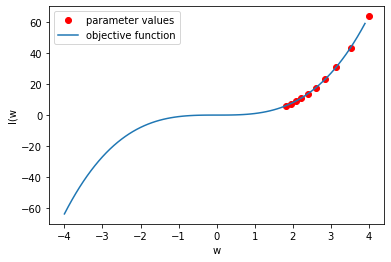

In [13]:
plot_cubic(w, optimizer)

In [0]:
def forth_order(yhat):
    out = torch.mean(2 * (yhat ** 4) -9 * (yhat **3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

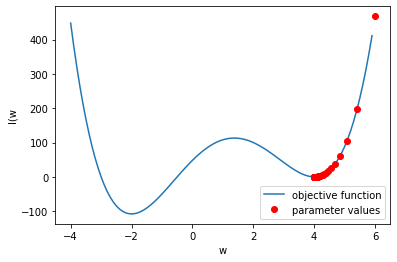

In [20]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_forth_order(w, optimizer)

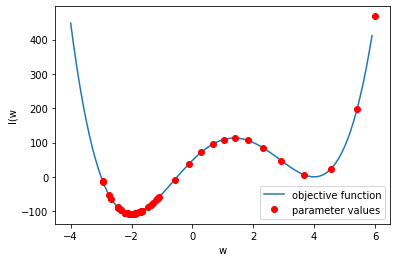

In [21]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_forth_order(w, optimizer)

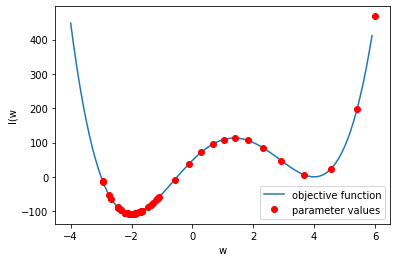

In [23]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_forth_order(w, optimizer, std=10)